In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('BO_truncated_mso_2018.pcl', 'rb') as handle:
    b = pickle.load(handle)
df=pd.DataFrame(b)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50659 entries, 689249 to 765861
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          50659 non-null  int64         
 1   idosebe             50659 non-null  int64         
 2   DatumObdobja        50659 non-null  datetime64[ns]
 3   StarostLeta         50659 non-null  int64         
 4   MeseciBrezpos       50659 non-null  int64         
 5   MeseciDelDobe       50659 non-null  int64         
 6   IDSpola             50659 non-null  int64         
 7   OEN                 50659 non-null  int64         
 8   IDklasiusSRV        50659 non-null  int64         
 9   IDKlasiusP          50659 non-null  int64         
 10  IDKlasiusProgram    50659 non-null  int64         
 11  IDPrenehanjaDR      50659 non-null  int64         
 12  IDUpEnote           50659 non-null  int64         
 13  IDObcine            50659 non-null  int6

In [5]:
df_new = df[df['mso_from'].notna()]
df_new = df_new[df_new['mso_to'].notna()]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23880 entries, 689249 to 755580
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          23880 non-null  int64         
 1   idosebe             23880 non-null  int64         
 2   DatumObdobja        23880 non-null  datetime64[ns]
 3   StarostLeta         23880 non-null  int64         
 4   MeseciBrezpos       23880 non-null  int64         
 5   MeseciDelDobe       23880 non-null  int64         
 6   IDSpola             23880 non-null  int64         
 7   OEN                 23880 non-null  int64         
 8   IDklasiusSRV        23880 non-null  int64         
 9   IDKlasiusP          23880 non-null  int64         
 10  IDKlasiusProgram    23880 non-null  int64         
 11  IDPrenehanjaDR      23880 non-null  int64         
 12  IDUpEnote           23880 non-null  int64         
 13  IDObcine            23880 non-null  int6

In [6]:
df_new.head()

,Unnamed: 0,idosebe,DatumObdobja,StarostLeta,MeseciBrezpos,MeseciDelDobe,IDSpola,OEN,IDklasiusSRV,IDKlasiusP,...,IdIndikatorPrometa,ePrijava,IDStanjaZN,IDZaposljivosti,IzdelanZN,Razvrstitev ZRSZ,truncated,duration,mso_from,mso_to
689249,1473020,1234140,2018-04-30,50,2,155,1,1102,21,735,...,4,D,4,1,1,E,0,64,5141966000,2270307000
689250,999205,1029459,2018-01-31,35,0,3,1,409,42,659,...,4,D,0,0,0,E,0,6,6577229000,2227215000
689254,684107,830282,2018-12-31,31,11,9,2,402,37,639,...,4,D,4,1,1,E,0,343,1227912000,5855012000
689255,92475,146230,2018-02-28,44,1,170,1,409,25,797,...,4,N,4,1,1,E,0,41,5350883000,5939739000
689257,1580405,1285486,2018-02-28,53,0,324,1,702,13,603,...,4,N,0,1,0,E,0,1,5860580000,5045410000


In [7]:
mso_from={}
for mso in list(df_new.mso_from):
    if(mso not in mso_from):
        mso_from[mso]=1
    else:
        mso_from[mso]+=1
print(mso_from)

{5141966000: 38, '6577229000': 4, 1227912000: 1, 5350883000: 1, 5860580000: 21, 5831016000: 9, 1434268000: 5, 5185670000: 29, 5857481000: 1, 5300410000: 15, '3308189000': 1, 5330840000: 6, '7207565000': 1, 5654239000: 1, '7124970000': 1, '6779646000': 1, 5883679000: 2, 5042208000: 3, 5494516000: 83, 5669472000: 1, '3413527000': 1, 5623677000: 9, 5372780000: 1, 1358324000: 1, 3022889000: 1, 5087066000: 1, 1922327000: 2, '6101321000': 1, 5490227000: 1, 1519140000: 347, 1602730000: 1, 2168898000: 8, '4098293000': 2, 5090202000: 3, '6184448000': 1, 5513214000: 1, '2344203000': 3, 2303442000: 12, 5082684000: 7, '3577325000': 4, 5054150000: 106, '2334003000': 1, '6641857000': 7, 5185391000: 3, 5083958000: 4, '3986357000': 14, '3223493000': 3, '3456218000': 2, 5004837000: 25, 5195411000: 4, 5144015000: 1, '3787052000': 1, 9999999999: 400, 2000148000: 3, 5057078000: 6, '6993524000': 8, '7013639000': 1, 5057272000: 134, 5674115000: 78, 1300261000: 1, '6236618000': 2, 5537954000: 1, 2111357000: 

In [8]:
mso_to={}
for mso in list(df_new.mso_to):
    if(mso not in mso_to):
        mso_to[mso]=1
    else:
        mso_to[mso]+=1
print(mso_to)

{2270307000: 4, 2227215000: 34, 5855012000: 1, 5939739000: 2, 5045410000: 31, 5299349000: 4, 5115957000: 1, 5185670000: 30, 5163757000: 7, '6234488000': 1, 1615033000: 1, '3890821000': 4, '6001238000': 2, 2139430000: 25, 5005574000: 4, '7119046000': 1, 5881536001: 2, '2399199000': 17, 1983725003: 1, 5669472000: 1, '6548920000': 1, 5088089000: 4, 5463254000: 10, '7297084000': 3, 3022889000: 1, '5087066002': 1, 1922327000: 2, '6101321000': 1, 5784468000: 3, 1602730000: 1, 5300231000: 89, '8206465000': 1, 5022932000: 7, '6184448000': 1, 5513214000: 1, 1930133000: 12, '7156120000': 1, 5050332000: 4, '3577325000': 3, 5054150000: 93, 5085845000: 6, '6641857000': 6, 5185391000: 3, 5083974000: 4, 1752081000: 3, '3223493000': 3, 5531314000: 12, 5004837000: 31, 2111357000: 253, 5714702000: 3, '3787052000': 1, 9999999999: 328, '7176457000': 24, '6462642000': 13, 5003318000: 2, 5057272000: 194, '7197578000': 23, 5674115014: 1, '5101859001': 8, '2086832001': 1, 9999999000: 681, 5746132000: 2, '3637

In [9]:
maxfrom=[]
from_values=[]
for i in range(5):
    maxfrom.append(max(mso_from, key=mso_from.get))
    from_values.append(mso_from[maxfrom[i]])
    del mso_from[maxfrom[i]]
    print(i+1, ": ", maxfrom[i], ": ", from_values[i])

1 :  9999999000 :  496
2 :  9999999999 :  400
3 :  1519140000 :  347
4 :  2111357000 :  247
5 :  5057272000 :  134


In [10]:
maxto=[]
to_values=[]
for i in range(5):
    maxto.append(max(mso_to, key=mso_to.get))
    to_values.append(mso_to[maxto[i]])
    del mso_to[maxto[i]]
    print(i+1, ": ", maxto[i], ": ", to_values[i])

1 :  9999999000 :  681
2 :  9999999999 :  328
3 :  2111357000 :  253
4 :  5057272000 :  194
5 :  1519140000 :  147


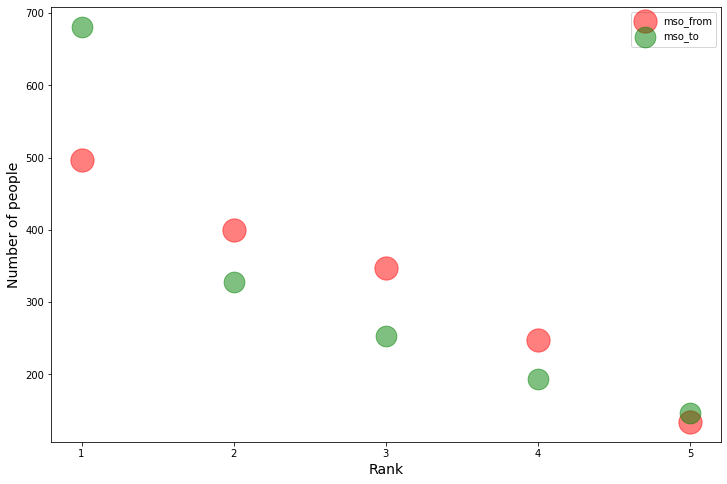

In [11]:
# print(maxfrom)
f_normal = min(from_values) / max(from_values)
t_normal = min(to_values) / max(to_values)
# f = [key/max(from_values) for key in from_values]
# t = [key/max(to_values) for key in to_values]


plt.figure(figsize=(12, 8))
plt.scatter([1,2,3,4,5], from_values, 
                  color='red', 
                 alpha=0.5,
                 s = f_normal * 2000,
                label = 'mso_from'
                )
plt.scatter([1,2,3,4,5], to_values, 
                  color='green', 
                 alpha=0.5,
                 s = t_normal * 2000,
                label = 'mso_to'
                 )

plt.xlabel("Rank", size=14)
plt.ylabel("Number of people", size=14)
xint = range(1, 6)
plt.xticks(xint)

plt.legend()

<Figure size 1440x720 with 0 Axes>

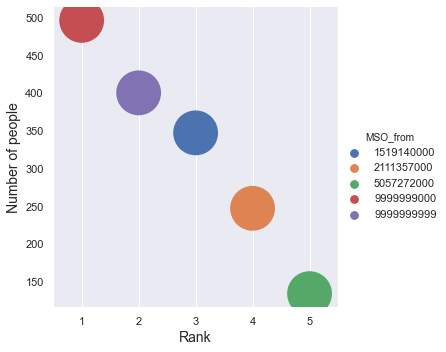

In [30]:
data_list = pd.DataFrame(
    {'x_axis': [1,2,3,4,5],
     'y_axis': from_values,
     'MSO_from': maxfrom
    })


minsize = min(data_list['y_axis'])
maxsize = max(data_list['y_axis'])

# scatter plot
plt.figure(figsize=(20,10))
sns_plot = sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="MSO_from",sizes=(minsize*15, maxsize*15), data=data_list)
plt.xlabel("Rank", size=14)
plt.ylabel("Number of people", size=14)
plt.grid()
sns_plot.savefig("output.png")

<Figure size 1440x720 with 0 Axes>

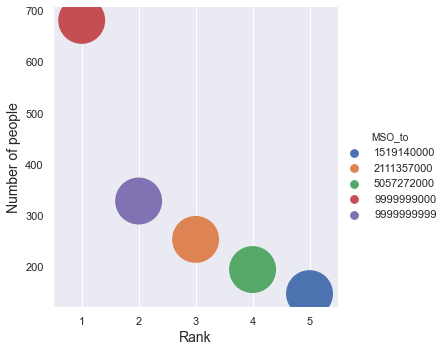

In [32]:
data_list = pd.DataFrame(
    {'x_axis': [1,2,3,4,5],
     'y_axis': to_values,
     'MSO_to': maxto
    })


minsize = min(data_list['y_axis'])
maxsize = max(data_list['y_axis'])


plt.figure(figsize=(20,10))
sns_plot = sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="MSO_to",sizes=(minsize*15, maxsize*15), data=data_list)
plt.xlabel("Rank", size=14)
plt.ylabel("Number of people", size=14)
plt.grid()
sns_plot.savefig("output2.png")